### EDA ( Exploratory Data Analysis)

* Here in Jupyter Notebook we are importing cleaned data after removal of all the nulls and handling errors from the dataset.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df= pd.read_excel(r'C:\Users\Fahim\Downloads\Dataset.xlsx')

In [45]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


In [46]:
df.shape

(11199, 16)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11199 non-null  object
 1   Model              11199 non-null  object
 2   Year               11199 non-null  int64 
 3   Engine Fuel Type   11199 non-null  object
 4   Engine HP          11199 non-null  int64 
 5   Engine Cylinders   11199 non-null  int64 
 6   Transmission Type  11199 non-null  object
 7   Driven_Wheels      11199 non-null  object
 8   Number of Doors    11199 non-null  int64 
 9   Market Category    11199 non-null  object
 10  Vehicle Size       11199 non-null  object
 11  Vehicle Style      11199 non-null  object
 12  highway MPG        11199 non-null  int64 
 13  city mpg           11199 non-null  int64 
 14  Popularity         11199 non-null  int64 
 15  MSRP               11199 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.4

* As we can see in above result there is no any null values or missing values are present in the dataset. We have imported cleaned dataset.

In [48]:
# Check for the outliers for Engine HP column

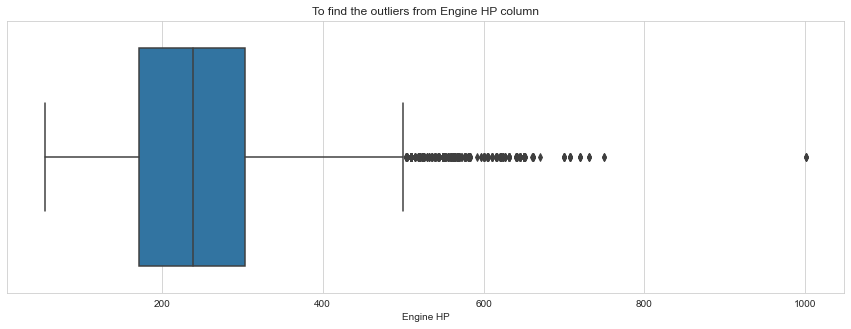

<Figure size 864x1440 with 0 Axes>

In [49]:
fig, axs = plt.subplots(1, 1,figsize=(15, 5))
plt.title("To find the outliers from Engine HP column")
sns.boxplot(x=df['Engine HP'])
sns.set_style('whitegrid')
plt.figure(figsize=(12,20))
plt.show()

In [50]:
# Verify for the outliers:

df[df['Engine HP']>520]['Market Category'].value_counts()

Exotic,High-Performance                                   109
Factory Tuner,Luxury,High-Performance                      73
Factory Tuner,High-Performance                             41
Luxury,High-Performance                                    33
Exotic,Factory Tuner,Luxury,High-Performance               29
Exotic,Luxury,High-Performance                             21
Crossover,Factory Tuner,Luxury,High-Performance            16
Exotic,Luxury,Performance                                  13
Exotic,Flex Fuel,Factory Tuner,Luxury,High-Performance     13
Exotic,Flex Fuel,Luxury,High-Performance                   11
Exotic,Factory Tuner,High-Performance                      11
High-Performance                                            6
Exotic,Luxury                                               6
Crossover,Luxury,High-Performance                           2
Factory Tuner,Luxury                                        2
Exotic,Luxury,High-Performance,Hybrid                       1
Flex Fue

In [51]:
# Check for the Outliers on Engine Cylinders column

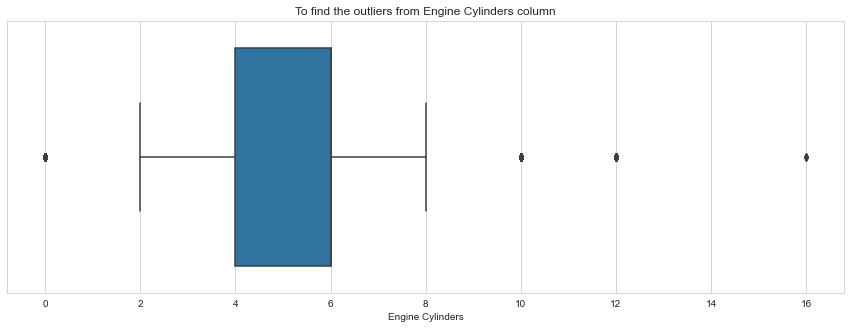

<Figure size 864x1440 with 0 Axes>

In [52]:
fig, axs = plt.subplots(1, 1,figsize=(15, 5))
plt.title("To find the outliers from Engine Cylinders column")
sns.boxplot(x=df['Engine Cylinders'])
sns.set_style('whitegrid')
plt.figure(figsize=(12,20))
plt.show()

In [53]:
df[df['Engine Cylinders']<1]['Engine Fuel Type'].value_counts()

electric    66
Name: Engine Fuel Type, dtype: int64

In [54]:
df[df['Engine Cylinders']>10]['Engine Fuel Type'].value_counts()

premium unleaded (required)                  195
flex-fuel (premium unleaded required/E85)     24
regular unleaded                               8
premium unleaded (recommended)                 4
Name: Engine Fuel Type, dtype: int64

In [55]:
df[df['Engine Cylinders']>8]['Market Category'].value_counts()

Exotic,High-Performance                                   141
Exotic,Luxury,Performance                                  25
Luxury,High-Performance                                    25
Exotic,Luxury,High-Performance                             19
Exotic,Factory Tuner,High-Performance                      19
Exotic,Flex Fuel,Factory Tuner,Luxury,High-Performance     13
Factory Tuner,Luxury,High-Performance                      13
Exotic,Flex Fuel,Luxury,High-Performance                   11
Exotic,Luxury                                              10
Luxury,Performance                                         10
Exotic,Factory Tuner,Luxury,High-Performance                5
Luxury                                                      3
Crossover,Luxury,Diesel                                     1
Factory Tuner,Luxury,Performance                            1
Name: Market Category, dtype: int64

In [56]:
# Cehck for the outliers by substracting highway

C:\Users\Fahim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


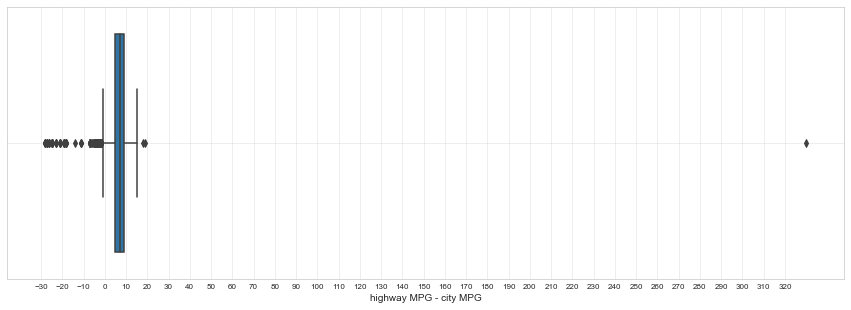

In [57]:
fig, axs = plt.subplots(1, 1,figsize=(15, 5))
sns.boxplot(df['highway MPG']-df['city mpg'], orient='h', ax=axs)
axs.set_xticks(np.arange(-30,330,10))
axs.tick_params(axis='x',pad=5,length=0, labelsize=8)
axs.set_xlabel('highway MPG - city MPG')
axs.grid(axis='y',alpha=0.4)
axs.grid(axis='x',alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [60]:
d = df['highway MPG']-df['city mpg']
d

0         7
1         9
2         8
3        10
4        10
         ..
11194     7
11195     7
11196     7
11197     7
11198     9
Length: 11199, dtype: int64

In [62]:
df['highway MPG'].loc[df[d<0].index] = df['city mpg'].loc[df[d<0].index]

C:\Users\Fahim\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [63]:
df[d>15]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1083,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATED_MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,354,24,3105,51600
2990,Chevrolet,Cruze,2015,diesel,148,4,AUTOMATIC,front wheel drive,4,Diesel,Midsize,Sedan,46,27,1385,25660
4030,Lotus,Evora 400,2017,premium unleaded (required),400,6,MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,39,21,613,91900


In [64]:
df['highway MPG'].iloc[1083]=35
df['highway MPG'].iloc[2990]=40
df['highway MPG'].iloc[4030]=24

C:\Users\Fahim\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [65]:
# Verified by threshold by plotting distplot

C:\Users\Fahim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


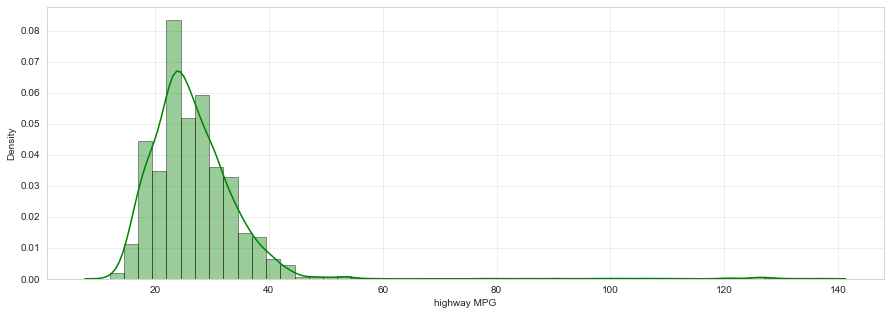

In [66]:
fig, axs = plt.subplots(1, 1,figsize=(15, 5))
sns.distplot(a=df['highway MPG'], color='green', 
             hist_kws={"edgecolor": 'black'}) 
axs.grid(axis='y',alpha=0.4)
axs.grid(axis='x',alpha=0.4)
axs.set_axisbelow(True)
plt.show()

C:\Users\Fahim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


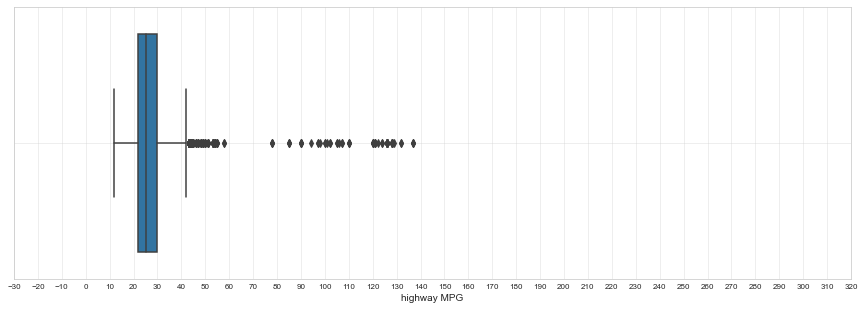

In [67]:
fig, axs = plt.subplots(1, 1,figsize=(15, 5))
sns.boxplot(df['highway MPG'], orient='h', ax=axs)
axs.set_xticks(np.arange(-30,330,10))
axs.tick_params(axis='x',pad=5,length=0, labelsize=8)
axs.set_xlabel('highway MPG')
axs.grid(axis='y',alpha=0.4)
axs.grid(axis='x',alpha=0.4)
axs.set_axisbelow(True)
plt.show()

C:\Users\Fahim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


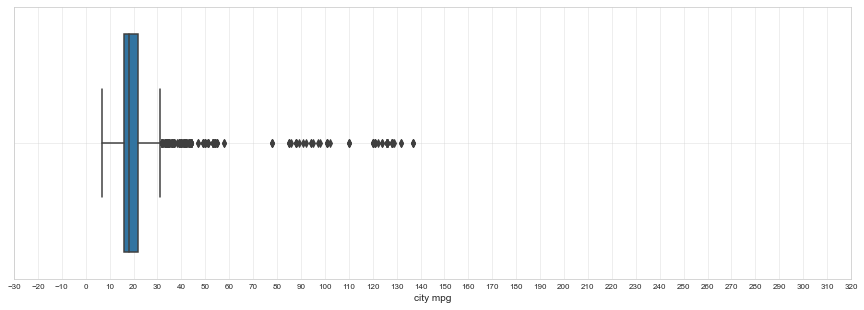

In [68]:
fig, axs = plt.subplots(1, 1,figsize=(15, 5))
sns.boxplot(df['city mpg'], orient='h', ax=axs)
axs.set_xticks(np.arange(-30,330,10))
axs.tick_params(axis='x',pad=5,length=0, labelsize=8)
axs.set_xlabel('city mpg')
axs.grid(axis='y',alpha=0.4)
axs.grid(axis='x',alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [69]:
# verified the threshold by plotting histplot as 

C:\Users\Fahim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


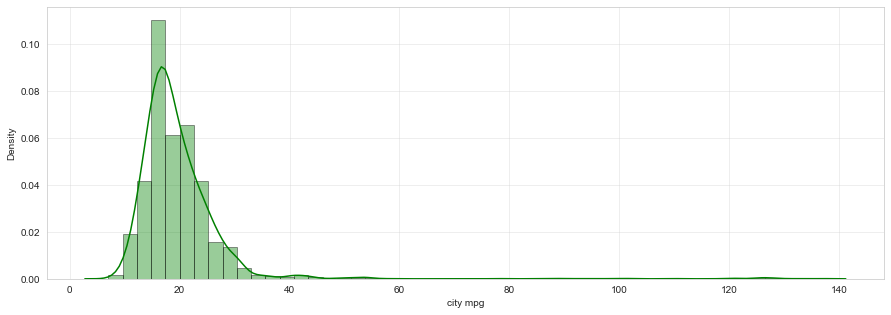

In [70]:
fig, axs = plt.subplots(1, 1,figsize=(15, 5))
sns.distplot(a=df['city mpg'], color='green', 
             hist_kws={"edgecolor": 'black'}) 
axs.grid(axis='y',alpha=0.4)
axs.grid(axis='x',alpha=0.4)
axs.set_axisbelow(True)
plt.show()

C:\Users\Fahim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


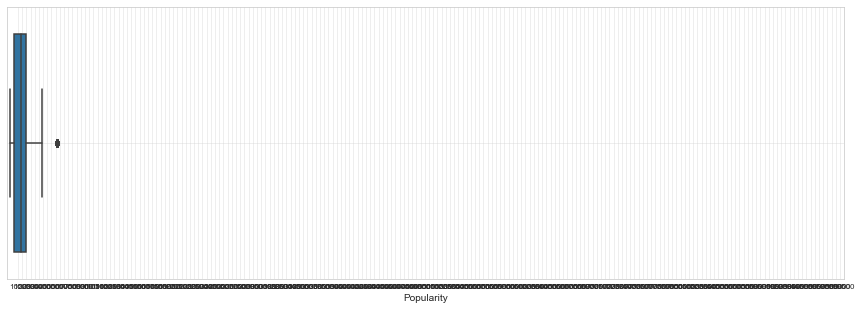

In [78]:
fig, axs = plt.subplots(1, 1,figsize=(15, 5))
sns.boxplot(df['Popularity'], orient='h', ax=axs)
axs.set_xticks(np.arange(1000,100000,500))
axs.tick_params(axis='x',pad=5,length=0, labelsize=8)
axs.set_xlabel('Popularity')
axs.grid(axis='y',alpha=0.4)
axs.grid(axis='x',alpha=0.4)
axs.set_axisbelow(True)
plt.show()

C:\Users\Fahim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


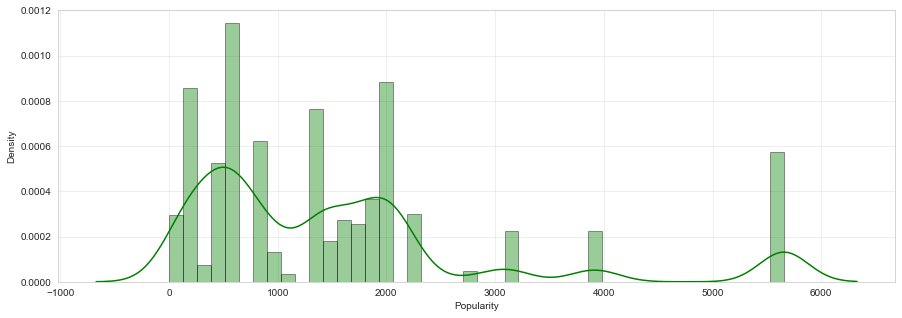

In [74]:
fig, axs = plt.subplots(1, 1,figsize=(15, 5))
sns.distplot(a=df['Popularity'], color='green', 
             hist_kws={"edgecolor": 'black'}) 
axs.grid(axis='y',alpha=0.4)
axs.grid(axis='x',alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [80]:
d = df[df['Popularity'] > 4000]
d['Make'].unique()

array(['Ford'], dtype=object)

In [ ]:
# Check the outliers from the MSRP column

C:\Users\Fahim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


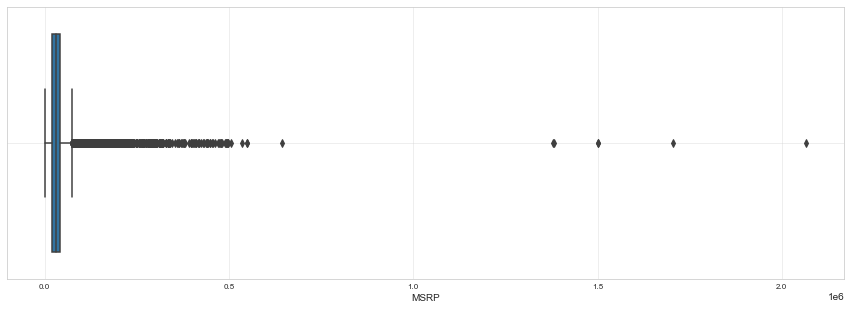

In [84]:
fig, axs = plt.subplots(1, 1,figsize=(15, 5))
sns.boxplot(df['MSRP'], orient='h', ax=axs)
##axs.set_xticks(np.arange(2000,200000,200000))
axs.tick_params(axis='x',pad=5,length=0, labelsize=8)
axs.set_xlabel('MSRP')
axs.grid(axis='y',alpha=0.4)
axs.grid(axis='x',alpha=0.4)
axs.set_axisbelow(True)
plt.show()

C:\Users\Fahim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


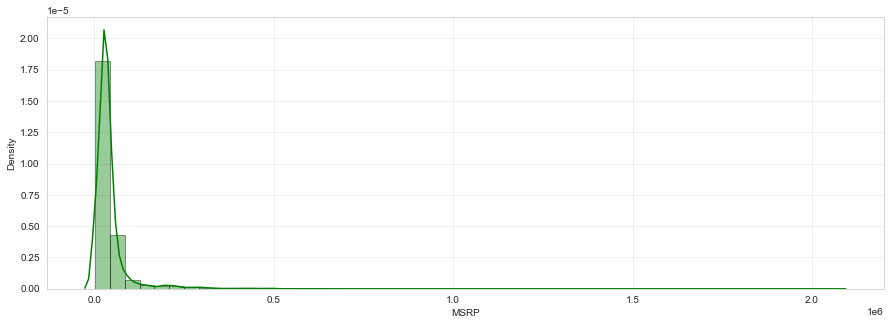

In [86]:
fig, axs = plt.subplots(1, 1,figsize=(15, 5))
sns.distplot(a=df['MSRP'], color='green', 
             hist_kws={"edgecolor": 'black'}) 
axs.grid(axis='y',alpha=0.4)
axs.grid(axis='x',alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [92]:
# After data cleaning download cleaned dataset:

df.to_csv('~/Desktop/Dataset.csv')